In [31]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from copy import copy
from skimage import morphology
import pandas as pd
import itertools
import math
import scipy.stats as stats
import seaborn as sns


plt.rcParams['figure.figsize'] = (10,6)
%config InlineBackend.figure_format = 'retina'

7px

In [59]:
def main(i):
    path = r"/Volumes/Public/DeepLearningData/016_Nakamura_Exp313/annotations/manually_mito_01-for-per-cell-quantification-220823//" +  str(i).zfill(4) + ".png"
    mito_er = cv2.imread(path, 0)
    mito =  copy(mito_er) 
    mito[mito != 1] = 0
    er =  copy(mito_er) 
    er[er != 2] = 0
    er = er/2
    mito_peri_3 = morphology.binary_dilation(mito, morphology.diamond(7)).astype(np.uint8) - morphology.binary_dilation(mito, morphology.diamond(6)).astype(np.uint8)
    mito_peri = morphology.binary_dilation(mito, morphology.diamond(1)).astype(np.uint8) - morphology.binary_dilation(mito, morphology.diamond(0)).astype(np.uint8)

    img = np.zeros(mito.shape + (3,), np.float32)
    img[:,:,0] = mito 
    img[:,:,1] = mito_peri_3
    img[:,:,2] = (mito_peri_3 + er)//2
    path_mito_er = r"/Volumes/Public/DeepLearningData/016_Nakamura_Exp313/annotation/mito_er//mito_er_-for-per-cell-quantification" +  str(i).zfill(4) + ".png"
    cv2.imwrite(path_mito_er, img*255)
    ans = np.sum(img[:,:,2]) / np.sum(mito_peri)
    print(f"image{i} {ans}")
    return ans

In [60]:

shCtrl_Ctrl = []
for i in range(0,17):

    shCtrl_Ctrl.append(main(i))

shCtrl_Tam = []
for i in range(17, 34):
    
    shCtrl_Tam.append(main(i))


shFKBP8_Ctrl = []
for i in range(34, 54):
    shFKBP8_Ctrl.append(main(i))
  
    
shFKBP8_Tam = []
for i in range(54, 73):
        shFKBP8_Tam.append(main(i))
    

image0 0.10209424083769633
image1 0.1461187214611872
image2 0.09455337690631808
image3 0.1270365997638725
image4 0.056217114372749934
image5 0.07310215557638237
image6 0.05141090065713181
image7 0.10090702947845805
image8 0.09821428571428571
image9 0.12754098360655738
image10 0.11239193083573487
image11 0.11638005905853743
image12 0.09387605427209388
image13 0.05677380594773205
image14 0.0312063344201211
image15 0.1431658562938952
image16 0.0705521472392638
image17 0.0681981335247667
image18 0.14770240700218817
image19 0.09219858156028368
image20 0.07301980198019802
image21 0.09425785482123511
image22 0.05890804597701149
image23 0.03229337712096333
image24 0.03683774834437086
image25 0.04020979020979021
image26 0.013363028953229399
image27 0.10021474588403723
image28 0.07998469192499043
image29 0.09165858389912707
image30 0.054982817869415807
image31 0.07207596029348295
image32 0.03187042842215256
image33 0.04960460100647016
image34 0.06481481481481481
image35 0.030728709394205442
imag

/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_5914/273922579.py:18: RuntimeWarning: invalid value encountered in divide
  ans = np.sum(img[:,:,2]) / np.sum(mito_peri)


image45 nan
image46 0.042953020134228186
image47 0.0938818565400844
image48 0.07169811320754717
image49 0.07166006481814909
image50 0.06356589147286822
image51 nan
image52 0.05217889908256881
image53 0.0712979890310786
image54 0.04314477468839885
image55 0.03255813953488372
image56 0.15309246785058175
image57 0.03978576893649579
image58 0.06510520047637952
image59 0.03760282021151586
image60 0.14332247557003258
image61 0.06712756467439786
image62 0.03547008547008547
image63 0.02089009990917348
image64 0.10215946843853821
image65 0.02476780185758514
image66 0.006372549019607843
image67 0.025165016501650164
image68 0.04346415828738242
image69 0.07273569608524438
image70 0.1
image71 0.048619447779111646
image72 0.03834355828220859


In [61]:
df1 = pd.DataFrame({"Condition": "shCtrl_Tam-", "mito-er contact / mito_perimeter" : shCtrl_Ctrl})
df2 = pd.DataFrame({"Condition": "shCtrl_Tam+", "mito-er contact / mito_perimeter" : shCtrl_Tam})
df3 =  pd.DataFrame({"Condition": "shFKBP8_Tam-", "mito-er contact / mito_perimeter" : shFKBP8_Ctrl})
df4 =  pd.DataFrame({"Condition": "shFKBP8_Tam+", "mito-er contact / mito_perimeter" : shFKBP8_Tam})

df = pd.concat([df1,df2], ignore_index=True)
df = pd.concat([df,df3], ignore_index=True)
df = pd.concat([df,df4], ignore_index=True)
df = df.dropna()
#df.to_csv(r"/Volumes/Public/DeepLearningData/016_Nakamura_Exp313/data//mito_er_contact_per_image-for-per-cell-quantification_8px.csv")
df

,Condition,mito-er contact / mito_perimeter
0,shCtrl_Tam-,0.102094
1,shCtrl_Tam-,0.146119
2,shCtrl_Tam-,0.094553
3,shCtrl_Tam-,0.127037
4,shCtrl_Tam-,0.056217
5,shCtrl_Tam-,0.073102
6,shCtrl_Tam-,0.051411
7,shCtrl_Tam-,0.100907
8,shCtrl_Tam-,0.098214
9,shCtrl_Tam-,0.127541


In [62]:
df = df.dropna()

In [63]:
pd.set_option('display.max_rows', 80)
df

,Condition,mito-er contact / mito_perimeter
0,shCtrl_Tam-,0.102094
1,shCtrl_Tam-,0.146119
2,shCtrl_Tam-,0.094553
3,shCtrl_Tam-,0.127037
4,shCtrl_Tam-,0.056217
5,shCtrl_Tam-,0.073102
6,shCtrl_Tam-,0.051411
7,shCtrl_Tam-,0.100907
8,shCtrl_Tam-,0.098214
9,shCtrl_Tam-,0.127541


In [64]:
df.groupby("Condition").describe()

mito-er contact / mito_perimeter                                \
                                        count      mean       std       min   
Condition                                                                     
shCtrl_Tam+                              17.0  0.066905  0.032872  0.013363   
shCtrl_Tam-                              17.0  0.094208  0.033426  0.031206   
shFKBP8_Tam+                             19.0  0.057880  0.040429  0.006373   
shFKBP8_Tam-                             18.0  0.056830  0.031858  0.000000   

                                                      
                   25%       50%       75%       max  
Condition                                             
shCtrl_Tam+   0.040210  0.068198  0.091659  0.147702  
shCtrl_Tam-   0.070552  0.098214  0.116380  0.146119  
shFKBP8_Tam+  0.034014  0.043145  0.069932  0.153092  
shFKBP8_Tam-  0.033785  0.064190  0.077494  0.107909

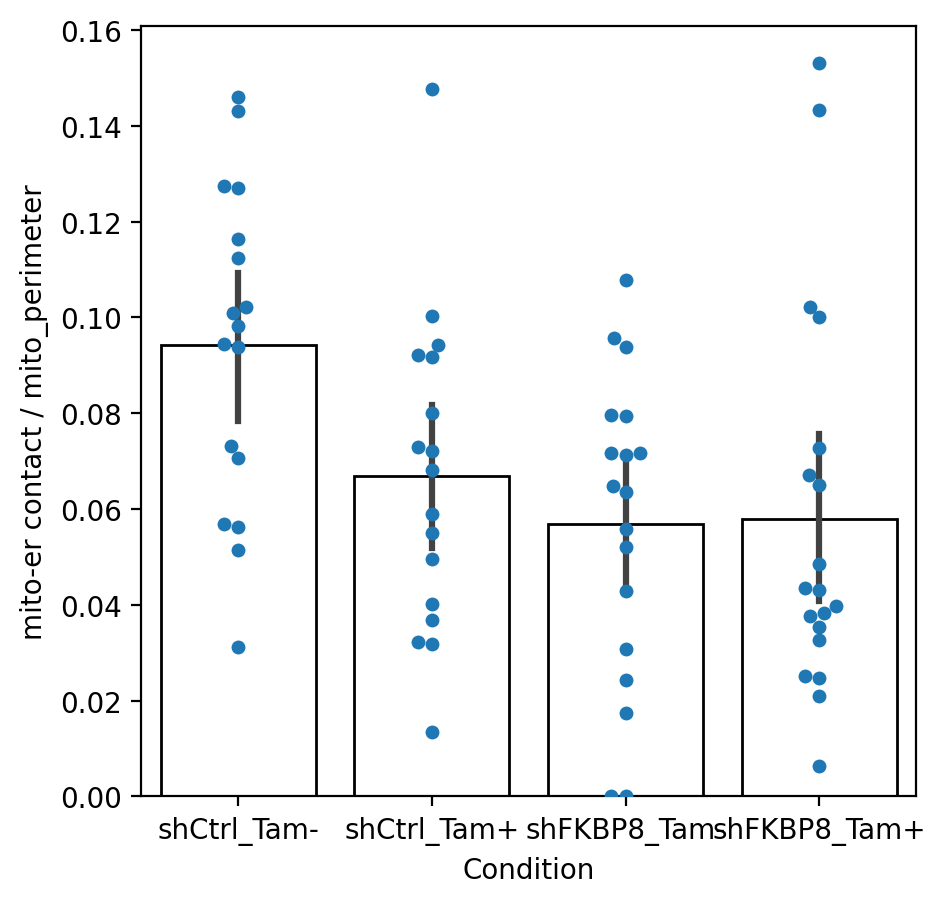

In [65]:
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)
ax1 = sns.swarmplot(x="Condition", y="mito-er contact / mito_perimeter", 
                    data=df, dodge=True) #
#ax1 = sns.boxplot(data=df, x="Condition", y='sum of intensity', orient='v', color='white')
ax1 = sns.barplot(data=df, x ="Condition", y = "mito-er contact / mito_perimeter", color = "white", edgecolor = "black")

#plt.title('Overlap (PDZD8 intensity on mito)')

6px

In [66]:
def main(i):
    path = r"/Volumes/Public/DeepLearningData/016_Nakamura_Exp313/annotations/manually_mito_01-for-per-cell-quantification-220823//" +  str(i).zfill(4) + ".png"
    mito_er = cv2.imread(path, 0)
    mito =  copy(mito_er) 
    mito[mito != 1] = 0
    er =  copy(mito_er) 
    er[er != 2] = 0
    er = er/2
    mito_peri_3 = morphology.binary_dilation(mito, morphology.diamond(6)).astype(np.uint8) - morphology.binary_dilation(mito, morphology.diamond(5)).astype(np.uint8)
    mito_peri = morphology.binary_dilation(mito, morphology.diamond(1)).astype(np.uint8) - morphology.binary_dilation(mito, morphology.diamond(0)).astype(np.uint8)

    img = np.zeros(mito.shape + (3,), np.float32)
    img[:,:,0] = mito 
    img[:,:,1] = mito_peri_3
    img[:,:,2] = (mito_peri_3 + er)//2
    path_mito_er = r"/Volumes/Public/DeepLearningData/016_Nakamura_Exp313/annotation/mito_er//mito_er_-for-per-cell-quantification" +  str(i).zfill(4) + ".png"
    cv2.imwrite(path_mito_er, img*255)
    ans = np.sum(img[:,:,2]) / np.sum(mito_peri)
    print(f"image{i} {ans}")
    return ans

In [67]:

shCtrl_Ctrl = []
for i in range(0,17):

    shCtrl_Ctrl.append(main(i))

shCtrl_Tam = []
for i in range(17, 34):
    
    shCtrl_Tam.append(main(i))


shFKBP8_Ctrl = []
for i in range(34, 54):
    shFKBP8_Ctrl.append(main(i))
  
    
shFKBP8_Tam = []
for i in range(54, 73):
        shFKBP8_Tam.append(main(i))
    

image0 0.0968586387434555
image1 0.1293759512937595
image2 0.0832244008714597
image3 0.11523022432113342
image4 0.05427859318748269
image5 0.06529209621993128
image6 0.048318515655199075
image7 0.09674981103552532
image8 0.09394409937888198
image9 0.1160655737704918
image10 0.10230547550432277
image11 0.10734757686294945
image12 0.09167583425009168
image13 0.05046560528687293
image14 0.02887750349324639
image15 0.13290113452188007
image16 0.06237218813905931
image17 0.06460875807609476
image18 0.1575492341356674
image19 0.06950354609929078
image20 0.06311881188118812
image21 0.09967497291440953
image22 0.07471264367816093
image23 0.031746031746031744
image24 0.031043046357615893
image25 0.04195804195804196
image26 0.014105419450631032
image27 0.09269863994273443
image28 0.07309605817068504
image29 0.08874878758486907
image30 0.050019091256204656
image31 0.08416055243849806
image32 0.023510971786833857
image33 0.038820992092020126
image34 0.04431216931216931
image35 0.029411764705882353

/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_5914/1710150202.py:18: RuntimeWarning: invalid value encountered in divide
  ans = np.sum(img[:,:,2]) / np.sum(mito_peri)


image45 nan
image46 0.04194630872483222
image47 0.08333333333333333
image48 0.06792452830188679
image49 0.0658984515664386
image50 0.06563307493540052
image51 nan
image52 0.04434250764525994
image53 0.06398537477148081
image54 0.04314477468839885
image55 0.031395348837209305
image56 0.14880587875076545
image57 0.03366488140780413
image58 0.058753473600635174
image59 0.03564433999216608
image60 0.13083604777415853
image61 0.05865298840321142
image62 0.03632478632478633
image63 0.01634877384196185
image64 0.09593023255813954
image65 0.02476780185758514
image66 0.006372549019607843
image67 0.018151815181518153
image68 0.04151800194615634
image69 0.06578642575862868
image70 0.09699248120300752
image71 0.03241296518607443
image72 0.03680981595092025


In [68]:
df1 = pd.DataFrame({"Condition": "shCtrl_Tam-", "mito-er contact / mito_perimeter" : shCtrl_Ctrl})
df2 = pd.DataFrame({"Condition": "shCtrl_Tam+", "mito-er contact / mito_perimeter" : shCtrl_Tam})
df3 =  pd.DataFrame({"Condition": "shFKBP8_Tam-", "mito-er contact / mito_perimeter" : shFKBP8_Ctrl})
df4 =  pd.DataFrame({"Condition": "shFKBP8_Tam+", "mito-er contact / mito_perimeter" : shFKBP8_Tam})

df = pd.concat([df1,df2], ignore_index=True)
df = pd.concat([df,df3], ignore_index=True)
df = pd.concat([df,df4], ignore_index=True)
df = df.dropna()
#df.to_csv(r"/Volumes/Public/DeepLearningData/016_Nakamura_Exp313/data//mito_er_contact_per_image-for-per-cell-quantification_8px.csv")
df

,Condition,mito-er contact / mito_perimeter
0,shCtrl_Tam-,0.096859
1,shCtrl_Tam-,0.129376
2,shCtrl_Tam-,0.083224
3,shCtrl_Tam-,0.115230
4,shCtrl_Tam-,0.054279
5,shCtrl_Tam-,0.065292
6,shCtrl_Tam-,0.048319
7,shCtrl_Tam-,0.096750
8,shCtrl_Tam-,0.093944
9,shCtrl_Tam-,0.116066


In [69]:
df = df.dropna()

In [70]:
pd.set_option('display.max_rows', 80)
df

,Condition,mito-er contact / mito_perimeter
0,shCtrl_Tam-,0.096859
1,shCtrl_Tam-,0.129376
2,shCtrl_Tam-,0.083224
3,shCtrl_Tam-,0.115230
4,shCtrl_Tam-,0.054279
5,shCtrl_Tam-,0.065292
6,shCtrl_Tam-,0.048319
7,shCtrl_Tam-,0.096750
8,shCtrl_Tam-,0.093944
9,shCtrl_Tam-,0.116066


In [71]:
df.groupby("Condition").describe()

mito-er contact / mito_perimeter                                \
                                        count      mean       std       min   
Condition                                                                     
shCtrl_Tam+                              17.0  0.064652  0.035053  0.014105   
shCtrl_Tam-                              17.0  0.086781  0.030441  0.028878   
shFKBP8_Tam+                             19.0  0.053280  0.038806  0.006373   
shFKBP8_Tam-                             18.0  0.052842  0.029738  0.000000   

                                                      
                   25%       50%       75%       max  
Condition                                             
shCtrl_Tam+   0.038821  0.064609  0.084161  0.157549  
shCtrl_Tam-   0.062372  0.093944  0.107348  0.132901  
shFKBP8_Tam+  0.031904  0.036810  0.062270  0.148806  
shFKBP8_Tam-  0.033294  0.058927  0.071527  0.102391

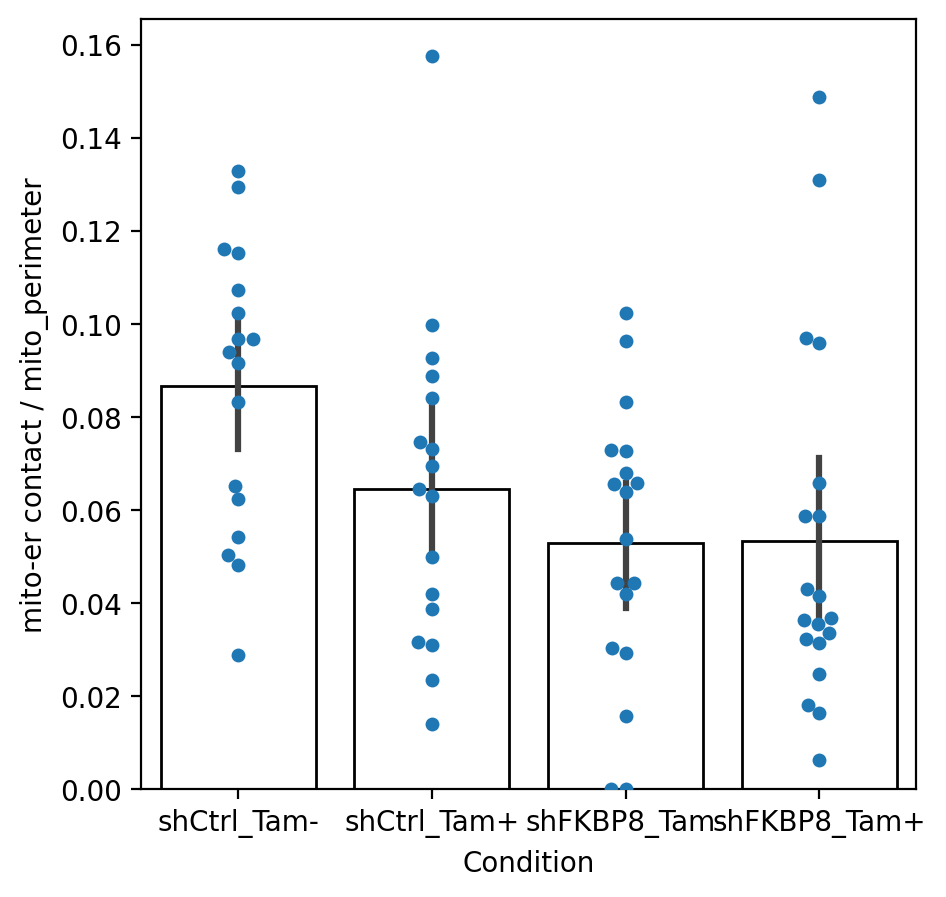

In [72]:
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)
ax1 = sns.swarmplot(x="Condition", y="mito-er contact / mito_perimeter", 
                    data=df, dodge=True) #
#ax1 = sns.boxplot(data=df, x="Condition", y='sum of intensity', orient='v', color='white')
ax1 = sns.barplot(data=df, x ="Condition", y = "mito-er contact / mito_perimeter", color = "white", edgecolor = "black")

#plt.title('Overlap (PDZD8 intensity on mito)')

5px

In [73]:
def main(i):
    path = r"/Volumes/Public/DeepLearningData/016_Nakamura_Exp313/annotations/manually_mito_01-for-per-cell-quantification-220823//" +  str(i).zfill(4) + ".png"
    mito_er = cv2.imread(path, 0)
    mito =  copy(mito_er) 
    mito[mito != 1] = 0
    er =  copy(mito_er) 
    er[er != 2] = 0
    er = er/2
    mito_peri_3 = morphology.binary_dilation(mito, morphology.diamond(5)).astype(np.uint8) - morphology.binary_dilation(mito, morphology.diamond(4)).astype(np.uint8)
    mito_peri = morphology.binary_dilation(mito, morphology.diamond(1)).astype(np.uint8) - morphology.binary_dilation(mito, morphology.diamond(0)).astype(np.uint8)

    img = np.zeros(mito.shape + (3,), np.float32)
    img[:,:,0] = mito 
    img[:,:,1] = mito_peri_3
    img[:,:,2] = (mito_peri_3 + er)//2
    path_mito_er = r"/Volumes/Public/DeepLearningData/016_Nakamura_Exp313/annotation/mito_er//mito_er_-for-per-cell-quantification" +  str(i).zfill(4) + ".png"
    cv2.imwrite(path_mito_er, img*255)
    ans = np.sum(img[:,:,2]) / np.sum(mito_peri)
    print(f"image{i} {ans}")
    return ans

In [74]:

shCtrl_Ctrl = []
for i in range(0,17):

    shCtrl_Ctrl.append(main(i))

shCtrl_Tam = []
for i in range(17, 34):
    
    shCtrl_Tam.append(main(i))


shFKBP8_Ctrl = []
for i in range(34, 54):
    shFKBP8_Ctrl.append(main(i))
  
    
shFKBP8_Tam = []
for i in range(54, 73):
        shFKBP8_Tam.append(main(i))
    

image0 0.09005235602094241
image1 0.1141552511415525
image2 0.06884531590413943
image3 0.10531286894923259
image4 0.051232345610634174
image5 0.058419243986254296
image6 0.04329339002705837
image7 0.08881330309901739
image8 0.0888975155279503
image9 0.10655737704918032
image10 0.0936599423631124
image11 0.10005211047420531
image12 0.08727539420608728
image13 0.04265545208771403
image14 0.025617140195621797
image15 0.12371690977849811
image16 0.053169734151329244
image17 0.05599425699928212
image18 0.16083150984682712
image19 0.04822695035460993
image20 0.04207920792079208
image21 0.08559046587215602
image22 0.08117816091954023
image23 0.03503010399562124
image24 0.029801324503311258
image25 0.04195804195804196
image26 0.013734224201930215
image27 0.0816034359341446
image28 0.06199770378874857
image29 0.08389912706110572
image30 0.045819014891179836
image31 0.08459214501510574
image32 0.017763845350052248
image33 0.03235082674335011
image34 0.04034391534391534
image35 0.0285338015803336

/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_5914/2983976077.py:18: RuntimeWarning: invalid value encountered in divide
  ans = np.sum(img[:,:,2]) / np.sum(mito_peri)


image46 0.04093959731543624
image47 0.06329113924050633
image48 0.057547169811320756
image49 0.05977673748649622
image50 0.06614987080103359
image51 nan
image52 0.040137614678899085
image53 0.05941499085923217
image54 0.04122722914669223
image55 0.03255813953488372
image56 0.14145744029393753
image57 0.029074215761285386
image58 0.04962286621675268
image59 0.033294163728946335
image60 0.11454940282301845
image61 0.04750223015165031
image62 0.03247863247863248
image63 0.008174386920980926
image64 0.0872093023255814
image65 0.02321981424148607
image66 0.006372549019607843
image67 0.015676567656765675
image68 0.03989620499513461
image69 0.055130877924484595
image70 0.0849624060150376
image71 0.026410564225690276
image72 0.032208588957055216


In [75]:
df1 = pd.DataFrame({"Condition": "shCtrl_Tam-", "mito-er contact / mito_perimeter" : shCtrl_Ctrl})
df2 = pd.DataFrame({"Condition": "shCtrl_Tam+", "mito-er contact / mito_perimeter" : shCtrl_Tam})
df3 =  pd.DataFrame({"Condition": "shFKBP8_Tam-", "mito-er contact / mito_perimeter" : shFKBP8_Ctrl})
df4 =  pd.DataFrame({"Condition": "shFKBP8_Tam+", "mito-er contact / mito_perimeter" : shFKBP8_Tam})

df = pd.concat([df1,df2], ignore_index=True)
df = pd.concat([df,df3], ignore_index=True)
df = pd.concat([df,df4], ignore_index=True)
df = df.dropna()
#df.to_csv(r"/Volumes/Public/DeepLearningData/016_Nakamura_Exp313/data//mito_er_contact_per_image-for-per-cell-quantification_8px.csv")
df

,Condition,mito-er contact / mito_perimeter
0,shCtrl_Tam-,0.090052
1,shCtrl_Tam-,0.114155
2,shCtrl_Tam-,0.068845
3,shCtrl_Tam-,0.105313
4,shCtrl_Tam-,0.051232
5,shCtrl_Tam-,0.058419
6,shCtrl_Tam-,0.043293
7,shCtrl_Tam-,0.088813
8,shCtrl_Tam-,0.088898
9,shCtrl_Tam-,0.106557


In [76]:
df = df.dropna()

In [77]:
pd.set_option('display.max_rows', 80)
df

,Condition,mito-er contact / mito_perimeter
0,shCtrl_Tam-,0.090052
1,shCtrl_Tam-,0.114155
2,shCtrl_Tam-,0.068845
3,shCtrl_Tam-,0.105313
4,shCtrl_Tam-,0.051232
5,shCtrl_Tam-,0.058419
6,shCtrl_Tam-,0.043293
7,shCtrl_Tam-,0.088813
8,shCtrl_Tam-,0.088898
9,shCtrl_Tam-,0.106557


In [78]:
df.groupby("Condition").describe()

mito-er contact / mito_perimeter                                \
                                        count      mean       std       min   
Condition                                                                     
shCtrl_Tam+                              17.0  0.058968  0.035466  0.013734   
shCtrl_Tam-                              17.0  0.078925  0.028658  0.025617   
shFKBP8_Tam+                             19.0  0.047422  0.035725  0.006373   
shFKBP8_Tam-                             18.0  0.048287  0.026603  0.000000   

                                                      
                   25%       50%       75%       max  
Condition                                             
shCtrl_Tam+   0.035030  0.048227  0.081603  0.160832  
shCtrl_Tam-   0.053170  0.088813  0.100052  0.123717  
shFKBP8_Tam+  0.027742  0.033294  0.052377  0.141457  
shFKBP8_Tam-  0.036147  0.055218  0.062905  0.097486

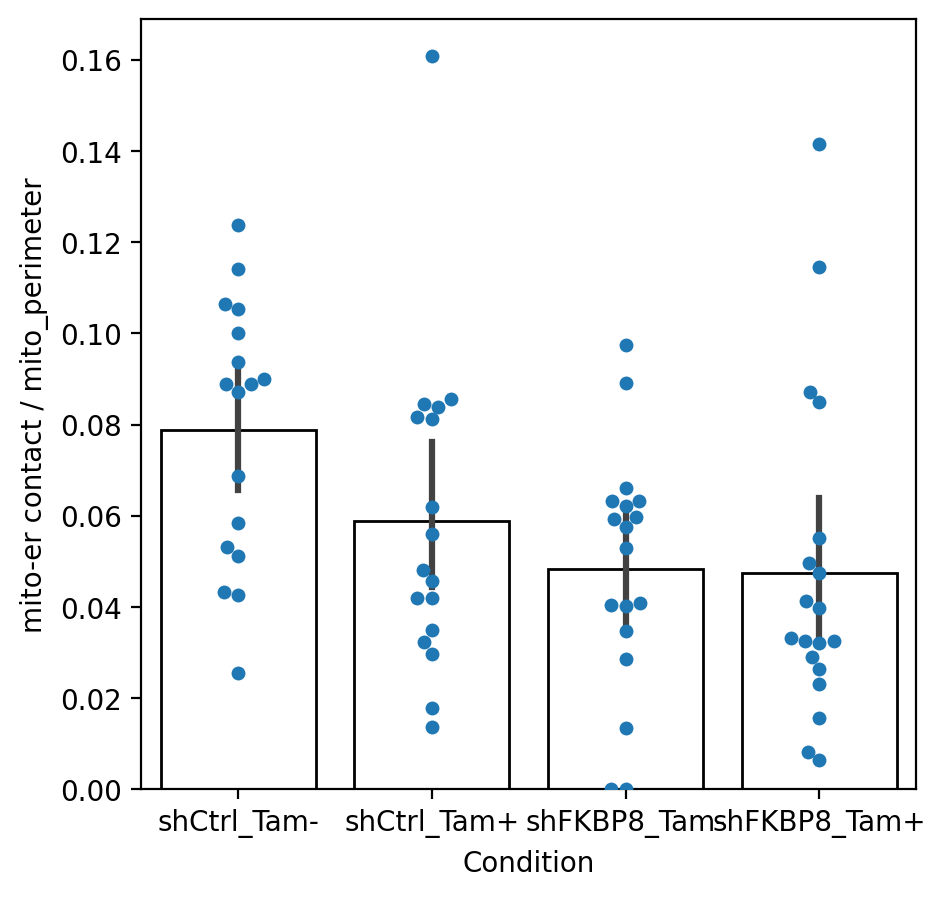

In [79]:
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)
ax1 = sns.swarmplot(x="Condition", y="mito-er contact / mito_perimeter", 
                    data=df, dodge=True) #
#ax1 = sns.boxplot(data=df, x="Condition", y='sum of intensity', orient='v', color='white')
ax1 = sns.barplot(data=df, x ="Condition", y = "mito-er contact / mito_perimeter", color = "white", edgecolor = "black")

#plt.title('Overlap (PDZD8 intensity on mito)')

4px

In [80]:
def main(i):
    path = r"/Volumes/Public/DeepLearningData/016_Nakamura_Exp313/annotations/manually_mito_01-for-per-cell-quantification-220823//" +  str(i).zfill(4) + ".png"
    mito_er = cv2.imread(path, 0)
    mito =  copy(mito_er) 
    mito[mito != 1] = 0
    er =  copy(mito_er) 
    er[er != 2] = 0
    er = er/2
    mito_peri_3 = morphology.binary_dilation(mito, morphology.diamond(4)).astype(np.uint8) - morphology.binary_dilation(mito, morphology.diamond(3)).astype(np.uint8)
    mito_peri = morphology.binary_dilation(mito, morphology.diamond(1)).astype(np.uint8) - morphology.binary_dilation(mito, morphology.diamond(0)).astype(np.uint8)

    img = np.zeros(mito.shape + (3,), np.float32)
    img[:,:,0] = mito 
    img[:,:,1] = mito_peri_3
    img[:,:,2] = (mito_peri_3 + er)//2
    path_mito_er = r"/Volumes/Public/DeepLearningData/016_Nakamura_Exp313/annotation/mito_er//mito_er_-for-per-cell-quantification" +  str(i).zfill(4) + ".png"
    cv2.imwrite(path_mito_er, img*255)
    ans = np.sum(img[:,:,2]) / np.sum(mito_peri)
    print(f"image{i} {ans}")
    return ans

In [81]:

shCtrl_Ctrl = []
for i in range(0,17):

    shCtrl_Ctrl.append(main(i))

shCtrl_Tam = []
for i in range(17, 34):
    
    shCtrl_Tam.append(main(i))


shFKBP8_Ctrl = []
for i in range(34, 54):
    shFKBP8_Ctrl.append(main(i))
  
    
shFKBP8_Tam = []
for i in range(54, 73):
        shFKBP8_Tam.append(main(i))
    

image0 0.08272251308900523
image1 0.1019786910197869
image2 0.06318082788671024
image3 0.09515938606847697
image4 0.050124619219052896
image5 0.044048734770384255
image6 0.03440278314650174
image7 0.07974300831443688
image8 0.07725155279503106
image9 0.09344262295081968
image10 0.07636887608069164
image11 0.09431995831162064
image12 0.08250825082508251
image13 0.035446079903875036
image14 0.019096413600372612
image15 0.10750945434900054
image16 0.03680981595092025
image17 0.048815506101938265
image18 0.15098468271334792
image19 0.02553191489361702
image20 0.02599009900990099
image21 0.07421451787648971
image22 0.08333333333333333
image23 0.033388067870826495
image24 0.026076158940397352
image25 0.04020979020979021
image26 0.014847809948032665
image27 0.06943450250536864
image28 0.04707233065442021
image29 0.07177497575169738
image30 0.039709812905689194
image31 0.07164436771687527
image32 0.013584117032392894
image33 0.02372393961179008
image34 0.03373015873015873
image35 0.02787532923

/var/folders/d7/0kyypypn3vl3pj9hqq2l66840000gp/T/ipykernel_5914/3189438275.py:18: RuntimeWarning: invalid value encountered in divide
  ans = np.sum(img[:,:,2]) / np.sum(mito_peri)


image46 0.03993288590604027
image47 0.04219409282700422
image48 0.05
image49 0.04897371263953907
image50 0.06201550387596899
image51 nan
image52 0.03688837920489297
image53 0.055758683729433274
image54 0.03691275167785235
image55 0.031395348837209305
image56 0.11696264543784446
image57 0.026013771996939557
image58 0.036125446605795954
image59 0.03055229142185664
image60 0.10423452768729642
image61 0.039473684210526314
image62 0.026923076923076925
image63 0.006357856494096276
image64 0.08139534883720931
image65 0.021671826625386997
image66 0.006372549019607843
image67 0.01155115511551155
image68 0.03795004865390853
image69 0.04378040305767894
image70 0.06992481203007518
image71 0.019807923169267706
image72 0.026840490797546013


In [82]:
df1 = pd.DataFrame({"Condition": "shCtrl_Tam-", "mito-er contact / mito_perimeter" : shCtrl_Ctrl})
df2 = pd.DataFrame({"Condition": "shCtrl_Tam+", "mito-er contact / mito_perimeter" : shCtrl_Tam})
df3 =  pd.DataFrame({"Condition": "shFKBP8_Tam-", "mito-er contact / mito_perimeter" : shFKBP8_Ctrl})
df4 =  pd.DataFrame({"Condition": "shFKBP8_Tam+", "mito-er contact / mito_perimeter" : shFKBP8_Tam})

df = pd.concat([df1,df2], ignore_index=True)
df = pd.concat([df,df3], ignore_index=True)
df = pd.concat([df,df4], ignore_index=True)
df = df.dropna()
#df.to_csv(r"/Volumes/Public/DeepLearningData/016_Nakamura_Exp313/data//mito_er_contact_per_image-for-per-cell-quantification_8px.csv")
df

,Condition,mito-er contact / mito_perimeter
0,shCtrl_Tam-,0.082723
1,shCtrl_Tam-,0.101979
2,shCtrl_Tam-,0.063181
3,shCtrl_Tam-,0.095159
4,shCtrl_Tam-,0.050125
5,shCtrl_Tam-,0.044049
6,shCtrl_Tam-,0.034403
7,shCtrl_Tam-,0.079743
8,shCtrl_Tam-,0.077252
9,shCtrl_Tam-,0.093443


In [83]:
df = df.dropna()

In [84]:
pd.set_option('display.max_rows', 80)
df

,Condition,mito-er contact / mito_perimeter
0,shCtrl_Tam-,0.082723
1,shCtrl_Tam-,0.101979
2,shCtrl_Tam-,0.063181
3,shCtrl_Tam-,0.095159
4,shCtrl_Tam-,0.050125
5,shCtrl_Tam-,0.044049
6,shCtrl_Tam-,0.034403
7,shCtrl_Tam-,0.079743
8,shCtrl_Tam-,0.077252
9,shCtrl_Tam-,0.093443


In [85]:
df.groupby("Condition").describe()

mito-er contact / mito_perimeter                                \
                                        count      mean       std       min   
Condition                                                                     
shCtrl_Tam+                              17.0  0.050608  0.034184  0.013584   
shCtrl_Tam-                              17.0  0.069066  0.027345  0.019096   
shFKBP8_Tam+                             19.0  0.040750  0.030921  0.006358   
shFKBP8_Tam-                             18.0  0.042642  0.023127  0.000000   

                                                      
                   25%       50%       75%       max  
Condition                                             
shCtrl_Tam+   0.025990  0.040210  0.071644  0.150985  
shCtrl_Tam-   0.044049  0.077252  0.093443  0.107509  
shFKBP8_Tam+  0.023843  0.031395  0.041627  0.116963  
shFKBP8_Tam-  0.034520  0.045093  0.054288  0.083998

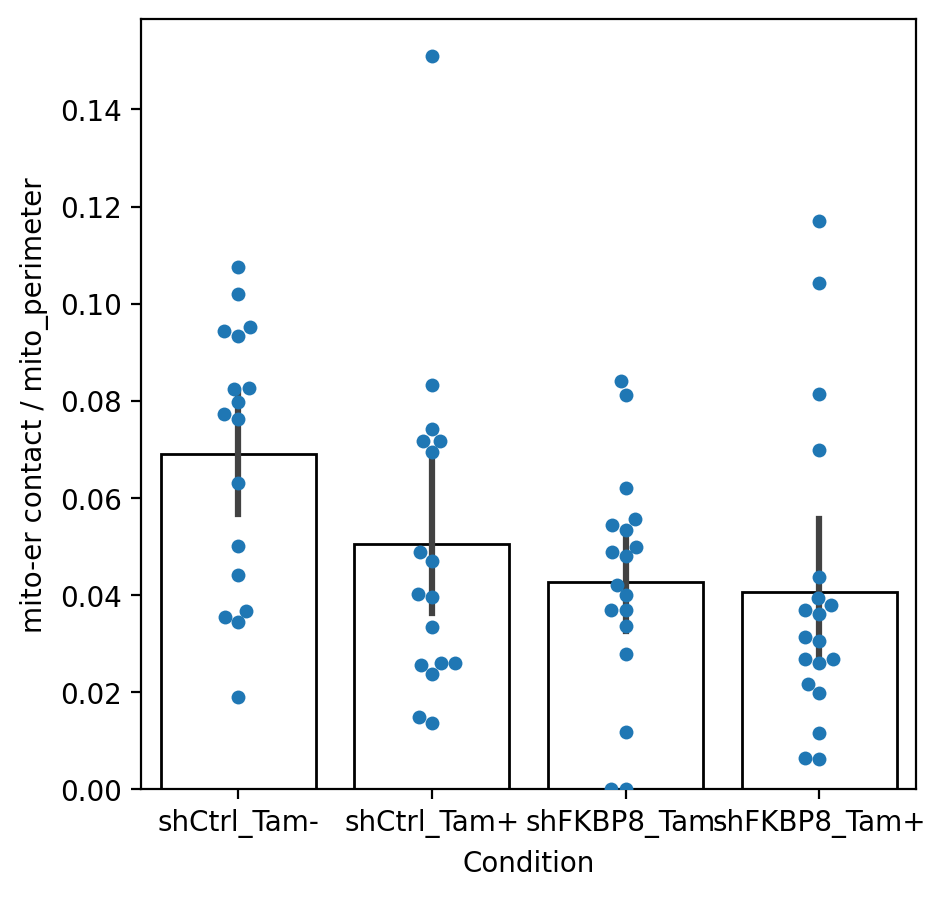

In [86]:
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)
ax1 = sns.swarmplot(x="Condition", y="mito-er contact / mito_perimeter", 
                    data=df, dodge=True) #
#ax1 = sns.boxplot(data=df, x="Condition", y='sum of intensity', orient='v', color='white')
ax1 = sns.barplot(data=df, x ="Condition", y = "mito-er contact / mito_perimeter", color = "white", edgecolor = "black")

#plt.title('Overlap (PDZD8 intensity on mito)')